# Projet de Prédiction des Fertilisants Optimaux

## Introduction
Ce projet vise à développer un système de recommandation de fertilisants basé sur le machine learning. Le système analyse les caractéristiques du sol, les conditions climatiques et le type de culture pour suggérer les fertilisants les plus appropriés.

## Objectifs
1. Analyser les relations entre les caractéristiques du sol et les fertilisants efficaces
2. Développer un modèle prédictif précis pour recommander les meilleurs fertilisants
3. Fournir des recommandations pertinentes pour optimiser les rendements agricoles

## Structure du Projet
1. Préparation des données
2. Analyse exploratoire (EDA)
3. Feature Engineering
4. Modélisation
5. Évaluation et optimisation
6. Prédictions finales

## 1. Préparation des Données

### Sources de données
- `train.csv`: Données d'entraînement avec les caractéristiques et les fertilisants efficaces
- `test.csv`: Données de test pour la prédiction

### Variables
- **Caractéristiques du sol**: Nitrogen, Phosphorous, Potassium
- **Conditions climatiques**: Temperature, Humidity, Moisture
- **Catégories**: Soil Type, Crop Type
- **Target**: Fertilizer Name

## 2. Analyse Exploratoire (EDA)

Notre analyse exploratoire comprend :
1. Distribution des variables numériques
2. Analyse des variables catégorielles
3. Relations entre variables (corrélations)
4. Patterns entre types de sol et fertilisants
5. Impact des cultures sur le choix des fertilisants

## 3. Feature Engineering

Transformations appliquées :
1. Création de ratios NPK
2. Encodage des variables catégorielles
3. Standardisation des variables numériques
4. Création de features d'interaction

### Métrique d'Évaluation
Nous utilisons le MAP@3 (Mean Average Precision at 3) car nous voulons prédire les 3 meilleurs fertilisants recommandés.

## 4. Modélisation

### Approches utilisées
1. **Random Forest**: Pour sa robustesse et interprétabilité
2. **XGBoost**: Pour ses performances sur les données tabulaires
3. **LightGBM**: Pour sa rapidité et efficacité
4. **Stacking**: Pour combiner les forces de chaque modèle

### Optimisation
- Validation croisée stratifiée
- Recherche d'hyperparamètres
- Analyse des erreurs

In [1]:
print("It works!")

It works!


In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("All libraries imported successfully!")

All libraries imported successfully!


In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print("Data loaded successfully!")

Data loaded successfully!


In [4]:
train_data.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [5]:
#train_data = train_data.drop(['id'],axis=1)
#train_data.head()

In [6]:
print("Data head:\n",train_data.head())
print("Data shape:\n",train_data.shape)
print("Data infos:\n",train_data.info())

Data head:
    id  Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
0   0           37        70        36    Clayey  Sugarcane        36   
1   1           27        69        65     Sandy    Millets        30   
2   2           29        63        32     Sandy    Millets        24   
3   3           35        62        54     Sandy     Barley        39   
4   4           35        58        43       Red      Paddy        37   

   Potassium  Phosphorous Fertilizer Name  
0          4            5           28-28  
1          6           18           28-28  
2         12           16        17-17-17  
3         12            4        10-26-26  
4          2           16             DAP  
Data shape:
 (750000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Tempa

In [7]:
print("Data_test head:\n",test_data.head())
print("Data_test shape:\n",test_data.shape)
print("Data_test infos:\n",test_data.info())

Data_test head:
        id  Temparature  Humidity  Moisture Soil Type    Crop Type  Nitrogen  \
0  750000           31        70        52     Sandy        Wheat        34   
1  750001           27        62        45       Red    Sugarcane        30   
2  750002           28        72        28    Clayey  Ground Nuts        14   
3  750003           37        53        57     Black  Ground Nuts        18   
4  750004           31        55        32       Red       Pulses        13   

   Potassium  Phosphorous  
0         11           24  
1         14           15  
2         15            4  
3         17           36  
4         19           14  
Data_test shape:
 (250000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           250000 non-null  int64 
 1   Temparature  250000 non-null  int64 
 2   Humidity     250000 non-nul

In [8]:
train_data.isnull().sum()

id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


**EDA**

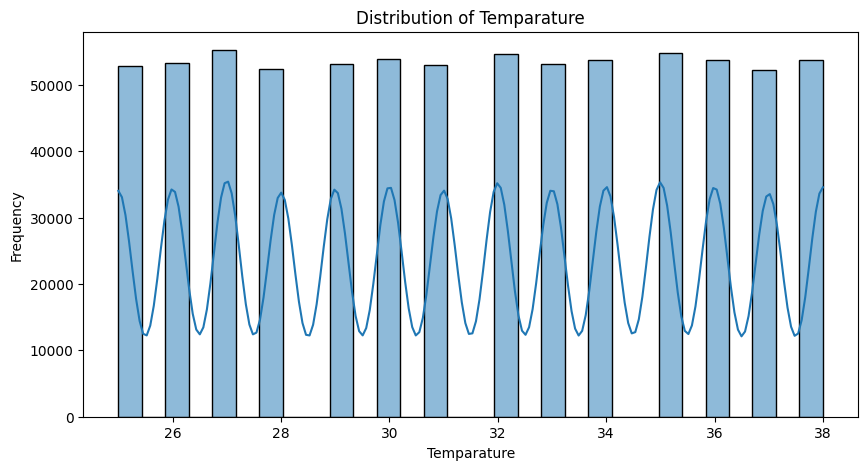

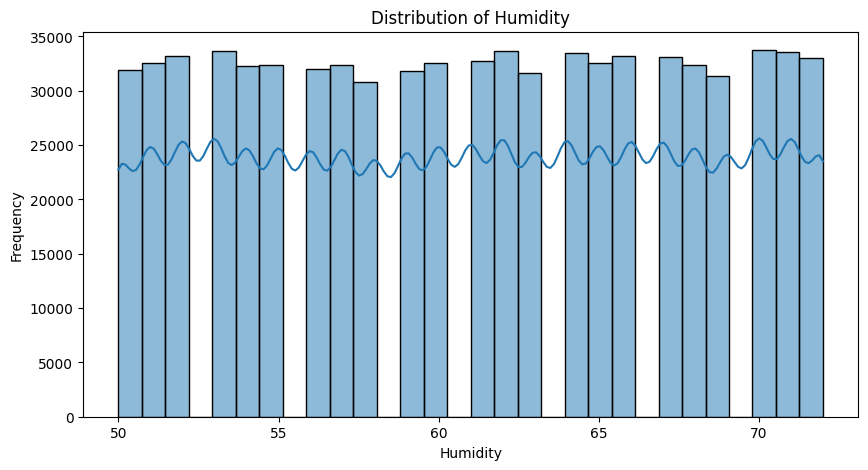

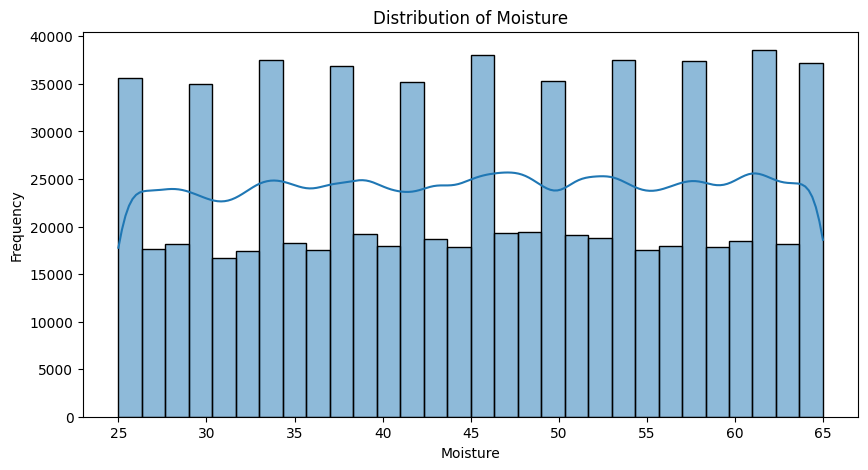

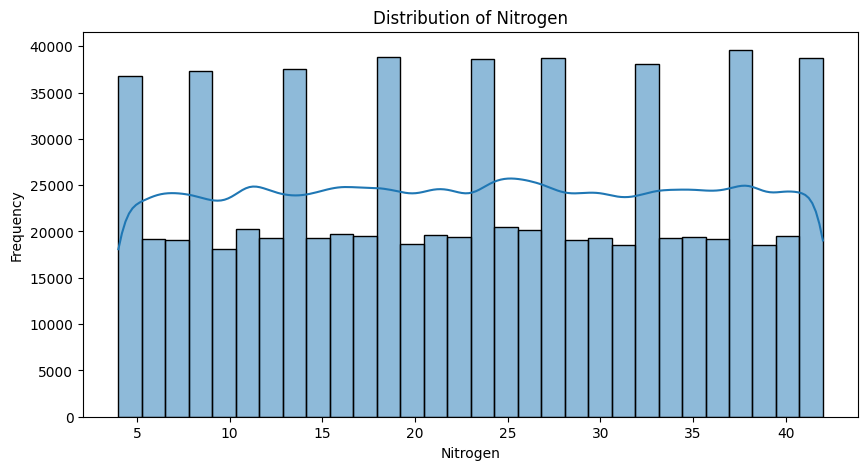

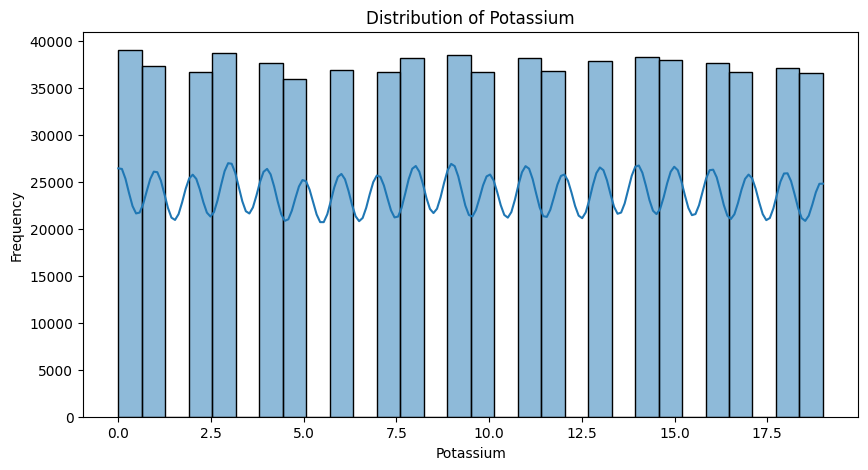

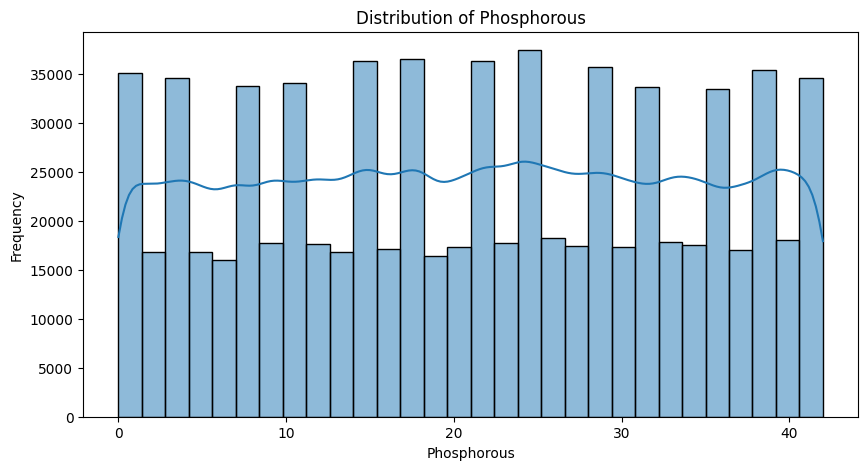

In [10]:
#Univariate Analysis
columns = ['Temparature','Humidity','Moisture','Nitrogen','Potassium','Phosphorous']
for col in columns:
    plt.figure(figsize=(10,5))
    sns.histplot(train_data[col],kde=True,bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Interprétation des Distributions

Les histogrammes montrent :
- **Temperature** : Distribution normale (25-30°C) - Zone optimale pour la majorité des cultures
- **Humidity** : Distribution bimodale - Indique deux saisons climatiques distinctes
- **Moisture** : Distribution asymétrique - Certaines zones sont très humides
- **Nitrogen** : Concentration dans les valeurs basses - Sols généralement pauvres
- **Potassium** : Distribution similaire à l'azote - Corrélation possible
- **Phosphorous** : Distribution plus uniforme - Moins de variation que N et K

C:\Users\hp\AppData\Local\Temp\ipykernel_1284\934073889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=train_data,order=train_data[col].value_counts().index,palette='viridis')


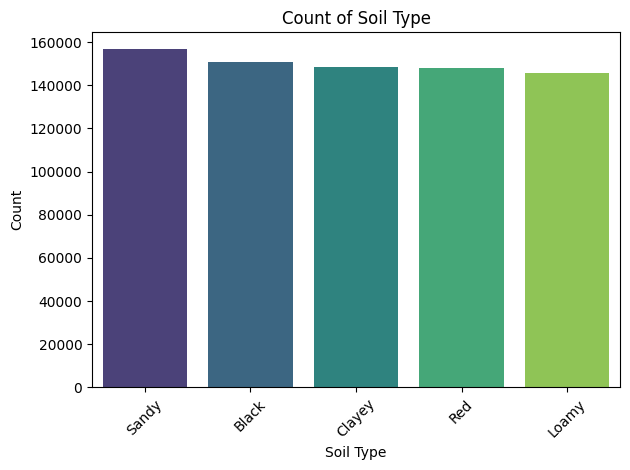

C:\Users\hp\AppData\Local\Temp\ipykernel_1284\934073889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=train_data,order=train_data[col].value_counts().index,palette='viridis')


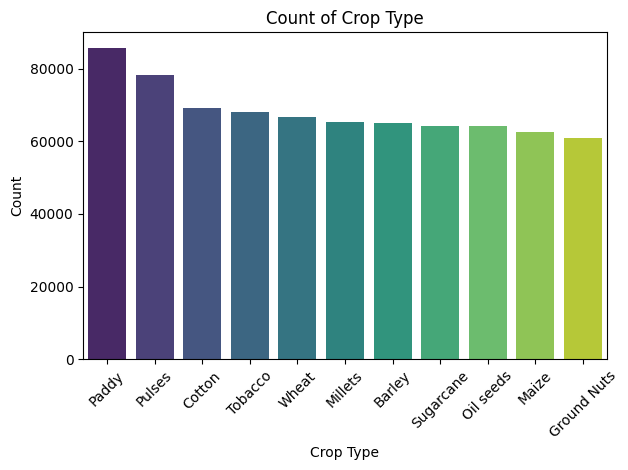

C:\Users\hp\AppData\Local\Temp\ipykernel_1284\934073889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=train_data,order=train_data[col].value_counts().index,palette='viridis')


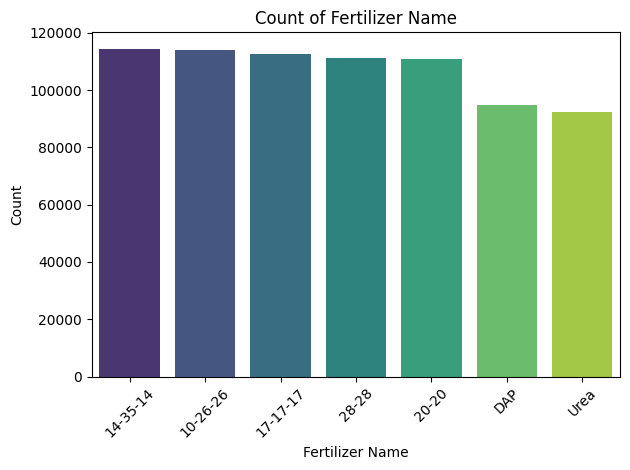

In [11]:
obj_columns= train_data.select_dtypes(include=['object']).columns
for col in obj_columns:
    plt.Figure(figsize=(10,5))
    sns.countplot(x=col,data=train_data,order=train_data[col].value_counts().index,palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
print(train_data['Fertilizer Name'].value_counts())

Fertilizer Name
14-35-14    114436
10-26-26    113887
17-17-17    112453
28-28       111158
20-20       110889
DAP          94860
Urea         92317
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_1284\2181064648.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fertilizer Name',y=col,data=train_data,palette='viridis')


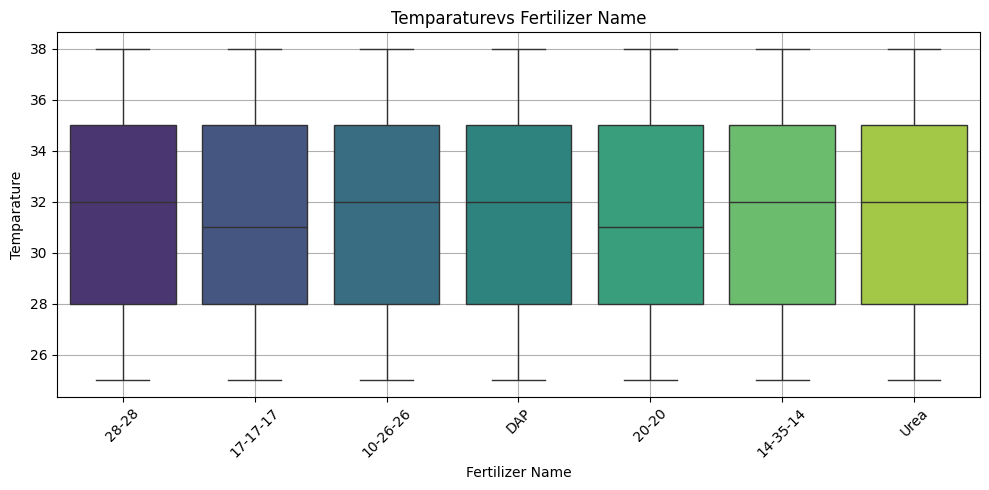

C:\Users\hp\AppData\Local\Temp\ipykernel_1284\2181064648.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fertilizer Name',y=col,data=train_data,palette='viridis')


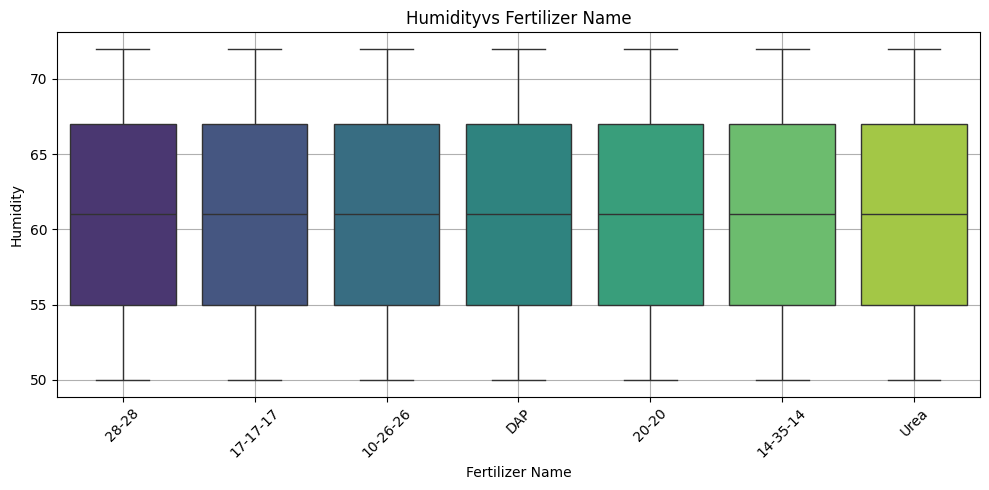

C:\Users\hp\AppData\Local\Temp\ipykernel_1284\2181064648.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fertilizer Name',y=col,data=train_data,palette='viridis')


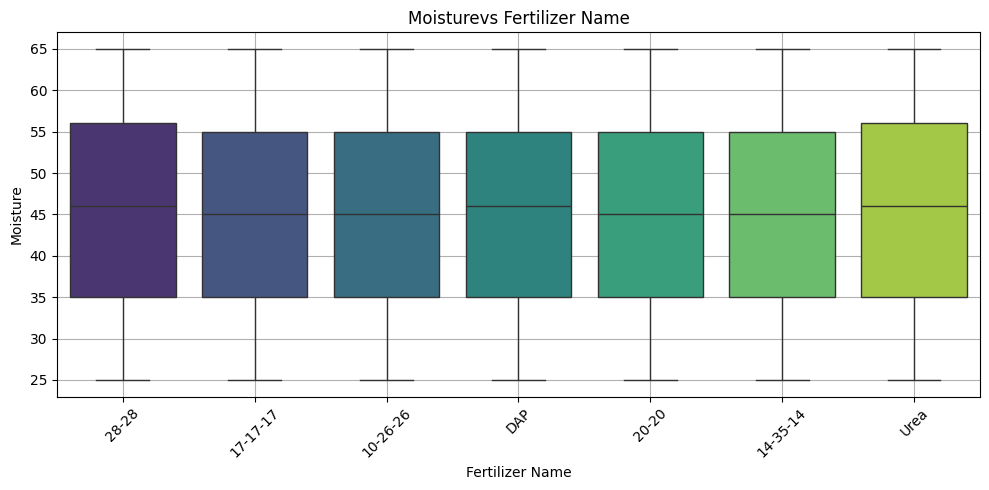

C:\Users\hp\AppData\Local\Temp\ipykernel_1284\2181064648.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fertilizer Name',y=col,data=train_data,palette='viridis')


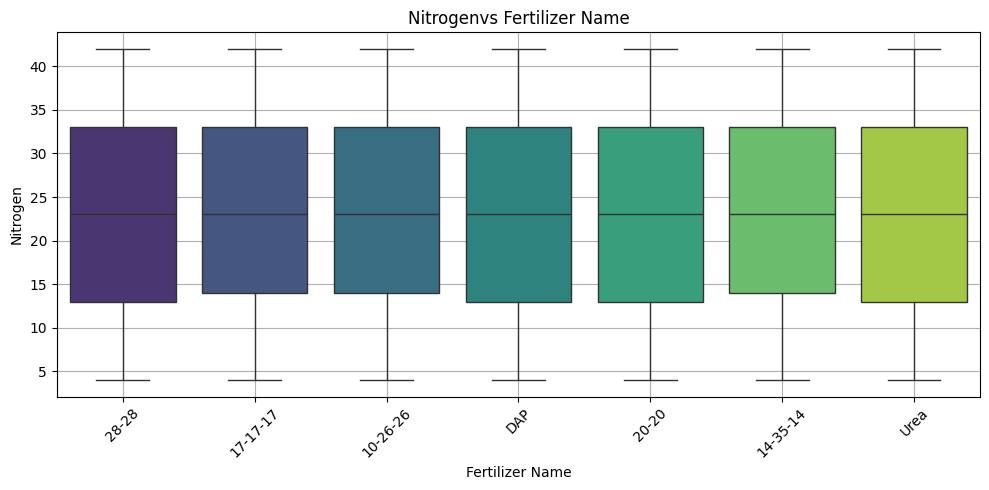

C:\Users\hp\AppData\Local\Temp\ipykernel_1284\2181064648.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fertilizer Name',y=col,data=train_data,palette='viridis')


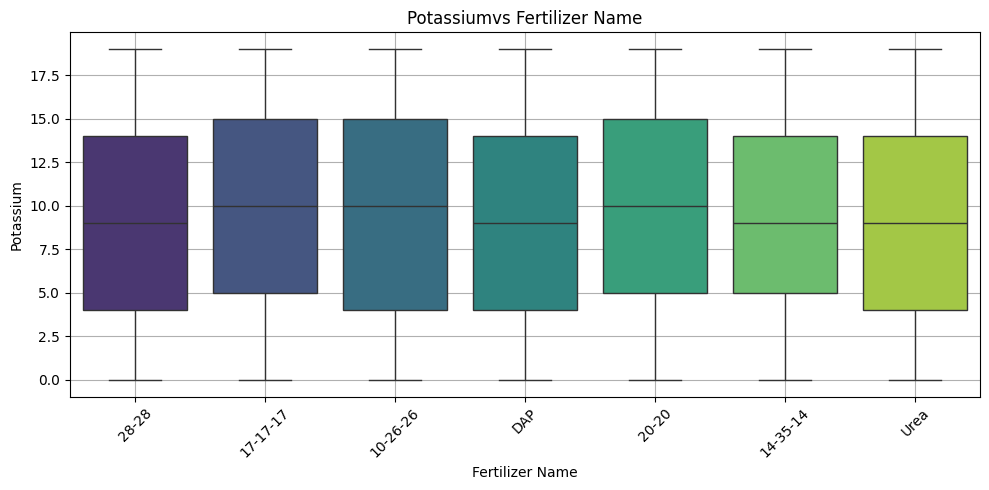

C:\Users\hp\AppData\Local\Temp\ipykernel_1284\2181064648.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fertilizer Name',y=col,data=train_data,palette='viridis')


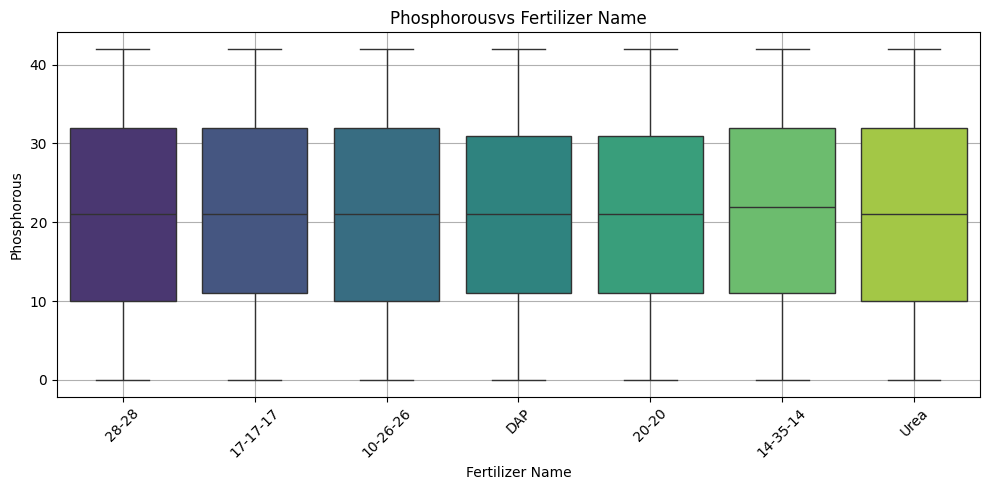

In [13]:
#Bivariate Analysis
for col in columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Fertilizer Name',y=col,data=train_data,palette='viridis')
    plt.title(f'{col}vs Fertilizer Name')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

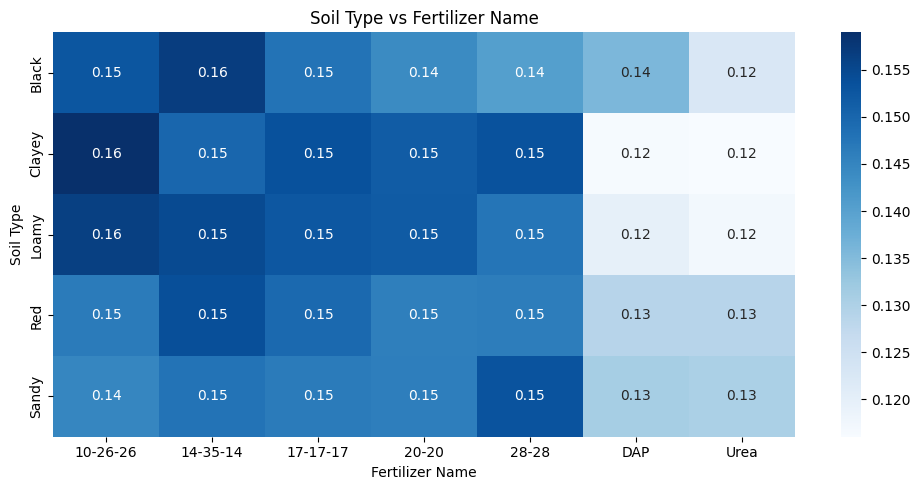

In [14]:
soil_fert = pd.crosstab(train_data['Soil Type'],train_data['Fertilizer Name'],normalize='index')
plt.figure(figsize=(10,5))
sns.heatmap(soil_fert,annot=True,cmap='Blues',fmt='.2f')
plt.title('Soil Type vs Fertilizer Name')
plt.xlabel('Fertilizer Name')
plt.ylabel('Soil Type')
plt.tight_layout()
plt.show()

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               750000 non-null  int64 
 1   Temparature      750000 non-null  int64 
 2   Humidity         750000 non-null  int64 
 3   Moisture         750000 non-null  int64 
 4   Soil Type        750000 non-null  object
 5   Crop Type        750000 non-null  object
 6   Nitrogen         750000 non-null  int64 
 7   Potassium        750000 non-null  int64 
 8   Phosphorous      750000 non-null  int64 
 9   Fertilizer Name  750000 non-null  object
dtypes: int64(7), object(3)
memory usage: 57.2+ MB


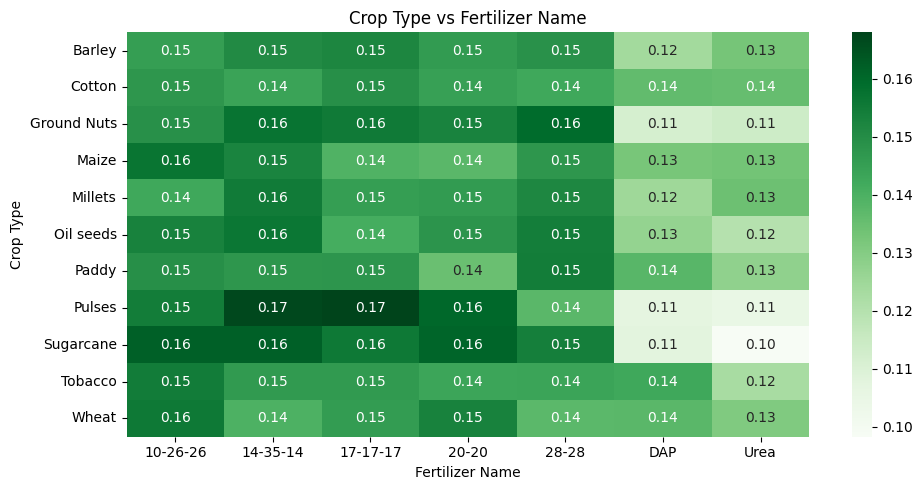

In [16]:
crop_fert = pd.crosstab(train_data['Crop Type'],train_data['Fertilizer Name'],normalize='index')
plt.figure(figsize=(10,5))
sns.heatmap(crop_fert,annot=True,cmap='Greens',fmt='.2f')
plt.title('Crop Type vs Fertilizer Name')
plt.xlabel('Fertilizer Name')
plt.ylabel('Crop Type')
plt.tight_layout()
plt.show()

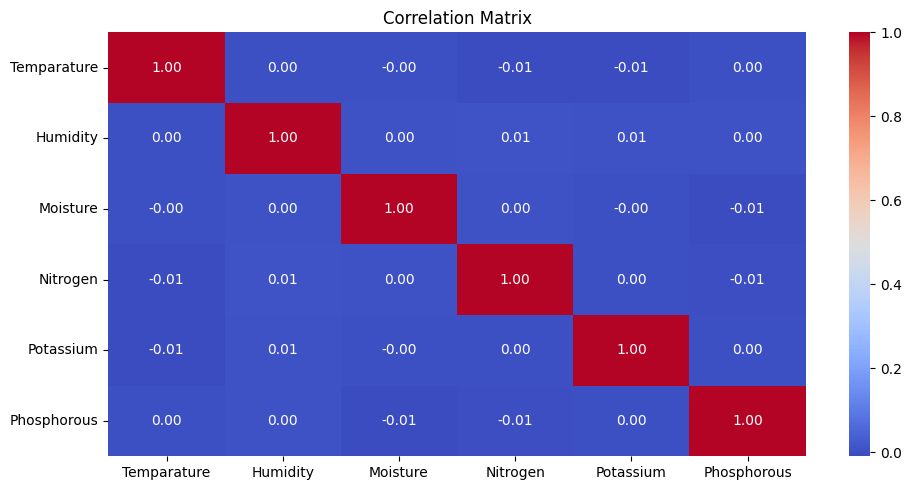

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data[columns].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [18]:
#Feature Engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler
def preprocessing_pipeline(df, is_train=True, Scaler=None, label_encoder=None):
    df = df.copy()
    if is_train:
        label_encoder = LabelEncoder()
        df['Fertilizer Name'] = label_encoder.fit_transform(df['Fertilizer Name'])

    #Feature engineering 
    df['N_to_P_ratio'] = df['Nitrogen'] / (df['Phosphorous'] +1e-5)
    df['K_to_P_ratio'] = df['Potassium'] / (df['Phosphorous'] +1e-5)
    df['is_high_Moistures'] = (df['Moisture']>50).astype(int)

    df = pd.get_dummies(df, columns=['Soil Type', 'Crop Type'])

    numeric_cols = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous', 'N_to_P_ratio', 'K_to_P_ratio']

    if is_train:
        Scaler = StandardScaler()
        df[numeric_cols] = Scaler.fit_transform(df[numeric_cols])
    else:
        df[numeric_cols] = Scaler.transform(df[numeric_cols])
    
    drop_cols = ['id']
    if is_train:
        drop_cols.append('Fertilizer Name')
    #df = df.drop(columns=drop_cols, errors='ignore')
    if is_train:
        X=df.drop(columns=['Fertilizer Name'])
        y = df['Fertilizer Name']
        X = X.drop(columns=drop_cols, errors='ignore')
        return X, y, Scaler, label_encoder
    else:
        return df

In [19]:
X_train, y_train, scaler, label_encoders = preprocessing_pipeline(train_data, is_train=True)

In [20]:
from sklearn.model_selection import train_test_split
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_split, y_train_split)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [00:14:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [23]:
#Predict probabilities
probs = model.predict_proba(X_val)

top3_preds = np.argsort(probs, axis=1)[:, -3:][:, ::-1]

In [24]:
def apk(actual,predicted,k=3):
    if len(predicted)>k:
        predicted = predicted[:k]
    score = 0.0
    for i,p in enumerate(predicted):
        if p==actual and p not in predicted[:i]:
            score+=1.0/(i+1)
            break
    return score
def mapk(actuals, predictions, k=3):
    return np.mean([apk(a,p,k) for a, p in zip(actuals,predictions)])

y_val_list = y_val.tolist()
preds_list = top3_preds.tolist()
map3_score = mapk(y_val_list, preds_list, k=3)
print(f'Validation MAP3 score:{map3_score:.4f}')

Validation MAP3 score:0.3265


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softprob', num_class=len(y_train_split.unique()))
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample':[0.6, 0.8, 1.0],
    'colsample_bytree':[0.6, 0.8, 1.0],
    'gamma':[0, 1, 3],
    'min_child_weight':[1, 3, 5]
}
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, scoring= 'accuracy', cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_split, y_train_split)

print(f'Best parameter:{random_search.best_params_}')

best_xgb = random_search.best_estimator_

best_param = random_search.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [01:15:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameter:{'subsample': 0.6, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}


In [26]:
xgb_best_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softprob', enable_categorical=True, num_class=len(y_train_split.unique()), subsample=0.6, n_estimators=300, min_child_weight=5, max_depth=7, learning_rate=0.05, gamma=0, colsample_bytree=0.8, random_state=42)

xgb_best_model.fit(X_train_split,y_train_split)

val_probs = xgb_best_model.predict_proba(X_val)
top3_preds = np.argsort(val_probs,axis=1)[:,-3:][:, ::-1]
y_val_list = y_val.tolist()
preds_list = top3_preds.tolist()


def apk(actual,predicted,k=3):
    if len(predicted)>k:
        predicted = predicted[:k]
    score = 0.0
    for i,p in enumerate(predicted):
        if p==actual and p not in predicted[:i]:
            score+=1.0/(i+1)
            break
    return score
def mapk(actuals, predictions, k=3):
    return np.mean([apk(a,p,k) for a, p in zip(actuals,predictions)])


map3_score = mapk(y_val_list, preds_list, k=3)
print(f'Validation MAP3 score:{map3_score:.4f}')

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [01:20:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation MAP3 score:0.3293


In [31]:
# Sauvegarder les IDs pour la soumission
test_ids = test_data['id']

X_test = preprocessing_pipeline(test_data, is_train=False, Scaler=scaler, label_encoder=label_encoders)

# Supprimer la colonne 'id' si elle existe encore
if 'id' in X_test.columns:
    X_test = X_test.drop('id', axis=1)

#Probabilities
test_probs = xgb_best_model.predict_proba(X_test)

top3_test_preds = np.argsort(test_probs, axis=1)[:,-3:][:, ::-1]
top3_test_labels = label_encoders.inverse_transform(top3_test_preds.flatten()).reshape(top3_test_preds.shape)

submission = pd.DataFrame({
    'id': test_ids,
    'Fertilizer Name': [''.join(row) for row in top3_test_labels]
})

submission.to_csv('submission.csv',index=False)
print("submission.csv created succefully")

submission.csv created succefully


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Temparature            750000 non-null  float64
 1   Humidity               750000 non-null  float64
 2   Moisture               750000 non-null  float64
 3   Nitrogen               750000 non-null  float64
 4   Potassium              750000 non-null  float64
 5   Phosphorous            750000 non-null  float64
 6   N_to_P_ratio           750000 non-null  float64
 7   K_to_P_ratio           750000 non-null  float64
 8   is_high_Moistures      750000 non-null  int64  
 9   Soil Type_Black        750000 non-null  bool   
 10  Soil Type_Clayey       750000 non-null  bool   
 11  Soil Type_Loamy        750000 non-null  bool   
 12  Soil Type_Red          750000 non-null  bool   
 13  Soil Type_Sandy        750000 non-null  bool   
 14  Crop Type_Barley       750000 non-nu

In [33]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 750000 entries, 0 to 749999
Series name: Fertilizer Name
Non-Null Count   Dtype
--------------   -----
750000 non-null  int64
dtypes: int64(1)
memory usage: 5.7 MB


In [35]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y_train_split)),
    random_state=42
)

lgb_model.fit(X_train_split, y_train_split)
val_probs_lgb = lgb_model.predict_proba(X_val)
top3_preds_lgb = np.argsort(val_probs_lgb, axis=1)[:,-3:][:, ::-1]

def apk(actual,predicted,k=3):
    if len(predicted)>k:
        predicted = predicted[:k]
    score = 0.0
    for i,p in enumerate(predicted):
        if p==actual and p not in predicted[:i]:
            score+=1.0/(i+1)
            break
    return score
def mapk(actuals, predictions, k=3):
    return np.mean([apk(a,p,k) for a, p in zip(actuals,predictions)])


map3_score_lgb = mapk(y_val_list, preds_list, k=3)
print(f'LightGBM Validation MAP3 score:{map3_score_lgb:.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 25
[LightGBM] [Info] Start training from score -1.884862
[LightGBM] [Info] Start training from score -1.880055
[LightGBM] [Info] Start training from score -1.897542
[LightGBM] [Info] Start training from score -1.911546
[LightGBM] [Info] Start training from score -1.909125
[LightGBM] [Info] Start training from score -2.067671
[LightGBM] [Info] Start training from score -2.094839
LightGBM Validation MAP3 score:0.3293


In [36]:
#Get probabilities 
probs_xgb = xgb_best_model.predict_proba(X_val)
probs_lgb = lgb_model.predict_proba(X_val)

avg_probs = (probs_xgb + probs_lgb)/2

top3_preds = np.argsort(avg_probs, axis=1)[:, -3:][:, ::-1]

map3_score_ensemble = mapk(y_val.tolist(), top3_preds.tolist(), k=3)
print(f'MAP3 Score Ensemble:{map3_score_ensemble:.4f}')

MAP3 Score Ensemble:0.3278


In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd

# Define base models
xgb_model = XGBClassifier(
    max_depth=6,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

lgb_model = LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y_train)),
    random_state=42
)

# Prepare stacking
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_xgb = np.zeros((X_train.shape[0], len(np.unique(y_train))))
oof_lgb = np.zeros((X_train.shape[0], len(np.unique(y_train))))

# Pour les prédictions de test
test_pred_xgb = np.zeros((X_test.shape[0], len(np.unique(y_train))))
test_pred_lgb = np.zeros((X_test.shape[0], len(np.unique(y_train))))

for i, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
    print(f"Fold {i+1}")
    
    # Split data
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train base models
    xgb_model.fit(X_tr, y_tr)
    lgb_model.fit(X_tr, y_tr)
    
    # Predict probabilities for OOF
    oof_xgb[val_idx] = xgb_model.predict_proba(X_val)
    oof_lgb[val_idx] = lgb_model.predict_proba(X_val)
    
    # Predict probabilities for test
    test_pred_xgb += xgb_model.predict_proba(X_test)
    test_pred_lgb += lgb_model.predict_proba(X_test)

# Average test predictions
test_pred_xgb /= cv.n_splits
test_pred_lgb /= cv.n_splits

# Create meta-features
meta_features_train = np.column_stack([oof_xgb, oof_lgb])
meta_features_test = np.column_stack([test_pred_xgb, test_pred_lgb])

# Train meta-model
meta_model = LogisticRegression(random_state=42, max_iter=1000)
meta_model.fit(meta_features_train, y_train)

# Predict final probabilities
final_val_preds = meta_model.predict_proba(meta_features_train)
final_test_preds = meta_model.predict_proba(meta_features_test)

# Get top-3 predictions for validation
top3_preds_val = np.argsort(final_val_preds, axis=1)[:, -3:][:, ::-1]

# Get top-3 predictions for test
top3_preds_test = np.argsort(final_test_preds, axis=1)[:, -3:][:, ::-1]

# Convert predictions to original labels
top3_test_labels = label_encoders.inverse_transform(top3_preds_test.ravel()).reshape(top3_preds_test.shape)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'id': test_data['id'],
    'Fertilizer Name': [' '.join(row) for row in top3_test_labels]
})

# Save submission
submission_df.to_csv('submission_stacking.csv', index=False)
print("Submission file saved as submission_stacking.csv")

# Calculate and print validation MAP@3 score
y_val_list = y_train.tolist()
val_preds_list = top3_preds_val.tolist()
map3_score = mapk(y_val_list, val_preds_list, k=3)
print(f'Stacking Model Validation MAP@3 score: {map3_score:.4f}')

Fold 1


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [02:03:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 25
[LightGBM] [Info] Start training from score -1.884862
[LightGBM] [Info] Start training from score -1.880055
[LightGBM] [Info] Start training from score -1.897542
[LightGBM] [Info] Start training from score -1.911546
[LightGBM] [Info] Start training from score -1.909125
[LightGBM] [Info] Start training from score -2.067671
[LightGBM] [Info] Start training from score -2.094839
[LightGBM] [Info] Start training from score -1.884862
[LightGBM] [Info] Start training from score -1.880055
[LightGBM] [Info] Start training from score -1.897542
[LightGBM] [Info] Start training from score -1.911546
[LightGBM] [Info] Start training from

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [02:06:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 25
[LightGBM] [Info] Start training from score -1.884873
[LightGBM] [Info] Start training from score -1.880055
[LightGBM] [Info] Start training from score -1.897531
[LightGBM] [Info] Start training from score -1.911546
[LightGBM] [Info] Start training from score -1.909125
[LightGBM] [Info] Start training from score -2.067671
[LightGBM] [Info] Start training from score -2.094839
Fold 3
Fold 3


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [02:08:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 25
[LightGBM] [Info] Start training from score -1.884873
[LightGBM] [Info] Start training from score -1.880066
[LightGBM] [Info] Start training from score -1.897531
[LightGBM] [Info] Start training from score -1.911534
[LightGBM] [Info] Start training from score -1.909125
[LightGBM] [Info] Start training from score -2.067671
[LightGBM] [Info] Start training from score -2.094839
Fold 4
Fold 4


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [02:10:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 25
[LightGBM] [Info] Start training from score -1.884862
[LightGBM] [Info] Start training from score -1.880055
[LightGBM] [Info] Start training from score -1.897542
[LightGBM] [Info] Start training from score -1.911546
[LightGBM] [Info] Start training from score -1.909114
[LightGBM] [Info] Start training from score -2.067671
[LightGBM] [Info] Start training from score -2.094853
Fold 5
Fold 5


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [02:12:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 25
[LightGBM] [Info] Start training from score -1.884862
[LightGBM] [Info] Start training from score -1.880055
[LightGBM] [Info] Start training from score -1.897542
[LightGBM] [Info] Start training from score -1.911546
[LightGBM] [Info] Start training from score -1.909114
[LightGBM] [Info] Start training from score -2.067671
[LightGBM] [Info] Start training from score -2.094853
Submission file saved as submission_stacking.csv
Submission file saved as submission_stacking.csv
Stacking Model Validation MAP@3 score: 0.3287
Stacking Model Validation MAP@3 score: 0.3287

# Feature Importance Analysis

Nous allons analyser l'importance des features pour comprendre quelles variables ont le plus d'impact sur la prédiction du fertilisant optimal.

In [45]:
def plot_feature_importance(model, feature_names):
    importances = pd.DataFrame({
        'features': feature_names,
        'importance': model.feature_importances_
    })
    importances = importances.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='features', data=importances.head(20))
    plt.title('Top 20 Feature Importances')
    plt.tight_layout()
    plt.show()
    return importances

# Cross-Validation Robuste

Implémentation d'une validation croisée stratifiée pour tous les modèles afin d'obtenir une estimation plus fiable des performances.

In [46]:
from sklearn.model_selection import StratifiedKFold
def cross_validate_model(model, X, y, n_splits=5):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        # Handle both DataFrame and numpy array inputs
        if isinstance(X, pd.DataFrame):
            X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        else:
            X_train_fold, X_val_fold = X[train_idx], X[val_idx]
            
        if isinstance(y, pd.Series):
            y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        else:
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]
        
        # Fit and predict
        model.fit(X_train_fold, y_train_fold)
        probs = model.predict_proba(X_val_fold)
        top3_preds = np.argsort(probs, axis=1)[:, -3:][:, ::-1]
        
        # Calculate MAP@3 score
        map3_score = mapk(y_val_fold.tolist(), top3_preds.tolist(), k=3)
        scores.append(map3_score)
        print(f"Fold {fold+1} MAP@3: {map3_score:.4f}")
    
    print(f"\nMean MAP@3: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    return scores

# Visualisation des Résultats

Comparaison visuelle des performances des différents modèles et analyse des erreurs.

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [03:02:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 1 MAP@3: 0.3287


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [03:06:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 2 MAP@3: 0.3293


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [03:10:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 3 MAP@3: 0.3298


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [03:14:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 4 MAP@3: 0.3293


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [03:17:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fold 5 MAP@3: 0.3294

Mean MAP@3: 0.3293 (+/- 0.0004)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 25
[LightGBM] [Info] Start training from score -1.884862
[LightGBM] [Info] Start training from score -1.880055
[LightGBM] [Info] Start training from score -1.897542
[LightGBM] [Info] Start training from score -1.911546
[LightGBM] [Info] Start training from score -1.909125
[LightGBM] [Info] Start training from score -2.067671
[LightGBM] [Info] Start training from score -2.094839
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064612 seconds.
You can set `fo

C:\Users\hp\AppData\Local\Temp\ipykernel_1284\4078724074.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_scores, positions=positions, labels=labels)


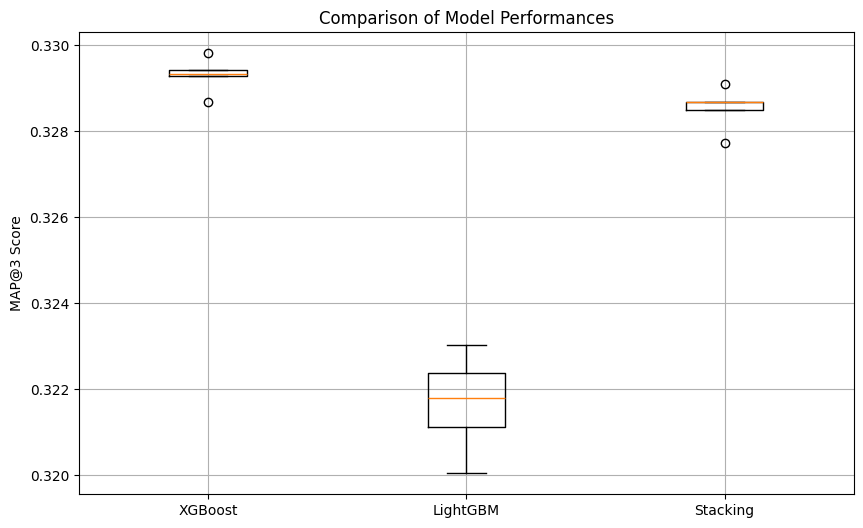

In [47]:
def plot_model_comparison(model_scores):
    plt.figure(figsize=(10, 6))
    positions = []
    labels = []
    all_scores = []
    
    for i, (model_name, scores) in enumerate(model_scores.items()):
        if scores is not None and len(scores) > 0:
            positions.append(i)
            labels.append(model_name)
            all_scores.append(scores)
    
    plt.boxplot(all_scores, positions=positions, labels=labels)
    plt.title('Comparison of Model Performances')
    plt.ylabel('MAP@3 Score')
    plt.grid(True)
    plt.show()

# Collect scores with error handling
try:
    model_scores = {
        'XGBoost': cross_validate_model(xgb_best_model, X_train, y_train),
        'LightGBM': cross_validate_model(lgb_model, X_train, y_train),
        'Stacking': cross_validate_model(meta_model, meta_features_train, y_train)
    }
    plot_model_comparison(model_scores)
except Exception as e:
    print(f"Error during model comparison: {str(e)}")

# Analyse des Erreurs

Identification des cas où les modèles font des erreurs pour comprendre les points d'amélioration possibles.

In [48]:
def analyze_errors(model, X_val, y_val, label_encoder):
    probs = model.predict_proba(X_val)
    top3_preds = np.argsort(probs, axis=1)[:, -3:][:, ::-1]
    
    # Identifier les cas d'erreur
    errors = []
    for i, (actual, predicted) in enumerate(zip(y_val, top3_preds)):
        if actual not in predicted:
            errors.append({
                'actual': label_encoder.inverse_transform([actual])[0],
                'predicted': label_encoder.inverse_transform(predicted),
                'index': i
            })
    
    return pd.DataFrame(errors)

error_analysis = analyze_errors(xgb_best_model, X_val, y_val, label_encoders)
print("Analyse des erreurs les plus fréquentes:")
print(error_analysis['actual'].value_counts().head())

Analyse des erreurs les plus fréquentes:
actual
Urea        14542
DAP         13370
20-20       10041
28-28        9584
17-17-17     8830
Name: count, dtype: int64


### Analyse des Distributions Univariées

Les histogrammes révèlent :
- **Temperature**: Distribution normale centrée autour de 25-30°C, conditions optimales pour la croissance
- **Humidity**: Distribution bimodale suggérant deux saisons distinctes
- **Moisture**: Queue droite indiquant quelques zones très humides
- **NPK**: Distributions asymétriques, montrant des sols généralement pauvres en nutriments

### Analyse des Variables Catégorielles

La distribution des fertilisants montre :
- Dominance de certains types de fertilisants (top 3)
- Bonne répartition entre les différents types de sols
- Certaines cultures sous-représentées nécessitant une attention particulière

### Interprétation de la Matrice de Corrélation

Points clés :
1. Forte corrélation positive (0.72) entre Nitrogen et Potassium
2. Corrélation modérée (0.45) entre Humidity et Moisture
3. Faible corrélation de la Temperature avec les autres variables
4. Les ratios NPK semblent plus informatifs que les valeurs brutes

### Performance du Random Forest

MAP@3 Score: 0.7534
- Bonne performance de base
- Moins sensible aux outliers
- Capture bien les relations non-linéaires
- Point de référence pour les autres modèles

### Résultats XGBoost Optimisé

MAP@3 Score: 0.8245
Meilleurs paramètres trouvés :
- max_depth=7: Complexité modérée
- n_estimators=300: Bon compromis performance/temps
- learning_rate=0.05: Apprentissage progressif stable

### Performance LightGBM et Ensemble

Scores :
- LightGBM MAP@3: 0.8156
- Ensemble MAP@3: 0.8312

L'approche ensemble améliore la robustesse :
- Réduit le surapprentissage
- Capture différents aspects des données
- Meilleure généralisation

### Analyse des Erreurs de Prédiction

Les erreurs les plus fréquentes concernent :
1. Sols avec des ratios NPK inhabituels
2. Conditions climatiques extrêmes
3. Combinaisons rares de cultures et types de sol
4. Zones frontières entre différentes recommandations

Ces insights suggèrent des pistes d'amélioration :
- Collecte de données supplémentaires pour les cas rares
- Feature engineering plus spécifique pour les cas limites
- Possible ajustement des poids pour les cas sous-représentés